# Analysis of Data Related to European Football Leagues

# Introduction

Football is believed to have originated in China in the third century BC. It is the world’s most popular ball game in numbers of players and spectators. Football, is a game in which two teams of 11 players, use any part of their bodies except their hands and arms to maneuver the ball into the opposing team’s goal. Only the goalkeeper is permitted to use his hands and may do so only within the penalty area surrounding the goal. The team that scores more goals wins. The standard length of a game is 90 minutes with a short break, known as ‘half time’, at the 45-minute mark. Football’s governing body is the Fédération Internationale de Football Association (FIFA). Only America and Canada call the sport soccer. 

# Goals

In this report, I analyze the Ultimate 25k+ Matches Football Database (European) from Kaggle to determine if there are ways to gain an advantage in predicting the outcome of a game. 

# Technical Requirements

1. Perform Data cleaning, exploratory data analysis and feature engineering.
2. Use parameters that gives the most important statistical insights of the data.
3. Create visualizations of the data.
4. Perform statistical inferences and hypothesis testing. Set appropriate significance levels and create confidence intervals for the variables of interest.
5. Apply linear machine learning models and use them for forecasting. 
6. Use cross validation, information criteria, and other methods to specify correct modeling.
7. Choose and use appropriate metrics to measure models' performances.
8. Provide clear explanations. 
9. Provide conclusions and suggest how the analysis can be improved.

# Standards

Below is a summary of the standards I followed to create this report. 

>* **Standard 1:** In the matches table, 11 players from each team are listed. I assumed that these 11 players are the only players that participated in the specific game.
>* **Standard 2:** I changed all column headers to follow the specific format of capitalizing the first letter of each word and connecting the two words together without underscore, like this example: "CountryID". 
>* **Standard 3:** If a column contained more than 75% missing data, I eliminated that column from the table.
>* **Standard 4:** To keep the data as conscise as possible, I dropped any column that I deemed unnecessary or useful to achieve the goals of this report. 

# Biases

Below are the biases I identified while creating this report.

>* **Bias 1:** Clear information about players in each team is not part of this data set. This may be because the players can change at any moment in the game and this information is not entered. 
>* **Bias 2:** I have no expertise football. There may be parts of the data that I have overlooked that may have been most important and I may have given importance to parts of the data that may have had little significance. 

# Libraries

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import xml.etree.ElementTree as ET
import eli5 as eli

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from xml.etree.ElementTree import fromstring, ElementTree
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from eli5.sklearn import PermutationImportance

# Display Parameters

## Display Features

In [3]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500
warnings.filterwarnings("ignore")

## Figure Parameters

In [4]:
size = 20
sns.set(style="white", palette="RdBu")

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# The Raw Data

For this report, I used the Ultimate 25k+ Matches Football Database - European dataset from Kaggle. This data set is comprised of seven (7) tables.
1. Country
2. Leauge
3. Player
4. Plater Attribute
5. Team
6. Team Attribute
7. Match

In [77]:
football = sqlite3.connect(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\database.sqlite"
)

In [80]:
football_db = {}

result = football.execute("SELECT name FROM sqlite_master WHERE type='table';")

for table in result:
    query = "SELECT * from " + str(table[0]) + ";"
    football_db[table[0]] = pd.read_sql_query(query, football)

# Data Overview and Cleaning

## Country

The section below contains information about the Country table and how I cleaned this table for further analysis.

In [81]:
country = football_db["Country"].copy()

In [82]:
country.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [356]:
country.rename(columns={"id": "CountryID", "name": "CountryName"}, inplace=True)

In [358]:
country

,CountryID,CountryName
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [388]:
country.shape

(11, 2)

### Section Summary
> 11 countries are represented in this data set. I changed the header for column "id" to "CountryID," and "name" to "CountryName." 

## League

The section below contains information about the League table and how I cleaned this table for further analysis.

In [85]:
league = football_db["League"].copy()

In [86]:
league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [363]:
del league["id"]
league = league.rename(columns={"country_id": "LeagueID", "name": "LeagueName"})

In [366]:
league.head()

,LeagueID,LeagueName
0,1,Belgium Jupiler League
1,1729,England Premier League
2,4769,France Ligue 1
3,7809,Germany 1. Bundesliga
4,10257,Italy Serie A


In [387]:
league.shape

(11, 2)

### Section Summary
> 11 leagues are represented in this data set, one from each country in the Country table. I dropped the "id" column because it contains the same information as the "country_id" column. I changed the header for column "country_id" to "LeagueID," and "name" to "LeagueName." 

## Player

The section below contains information about the Player table and how I cleaned this table for further analysis.

In [96]:
player = football_db["Player"].copy()

In [97]:
player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [89]:
player[player.duplicated()].sum()

id                    0.0
player_api_id         0.0
player_name           0.0
player_fifa_api_id    0.0
birthday              0.0
height                0.0
weight                0.0
dtype: float64

In [98]:
player.isna().sum()

id                    0
player_api_id         0
player_name           0
player_fifa_api_id    0
birthday              0
height                0
weight                0
dtype: int64

In [90]:
player.drop(columns=["id", "player_fifa_api_id"], inplace=True)
player = player.set_index("player_api_id")
player = player.rename_axis("player_api_id").reset_index()

In [91]:
player.rename(
    columns={
        "player_api_id": "PlayerID",
        "player_name": "PlayerName",
        "birthday": "Birthday",
        "height": "Height",
        "weight": "Weight",
    },
    inplace=True,
)

In [92]:
player["BMI"] = np.round(
    (player["Weight"] / 2.205) / ((player["Height"] / 100.0) ** 2), 2
)

In [93]:
player["Birthday"] = pd.DatetimeIndex(player["Birthday"]).year

In [94]:
player.head()

,PlayerID,PlayerName,Birthday,Height,Weight,BMI
0,505942,Aaron Appindangoye,1992,182.88,187,25.36
1,155782,Aaron Cresswell,1989,170.18,146,22.86
2,162549,Aaron Doran,1991,170.18,163,25.52
3,30572,Aaron Galindo,1982,182.88,198,26.85
4,23780,Aaron Hughes,1979,182.88,154,20.88


In [385]:
player.shape

(11060, 6)

### Section Summary
> * This table contains no duplicate values.
> * This table contains no  Null values.
> * I eliminated these columns from the Player table: "id", "player_fifa_api_id".
> * I changed the names of the other columns to the consistent format for this report as indicated in the Standards section.
> * Using the "Weight" and "Height" columns, I calcuated the BMI for each player and included it in this table. 

## Player Attributes

The section below contains information about the Player Attributes table and how I cleaned this table for further analysis.

In [136]:
player_attributes = football_db["Player_Attributes"].copy()

In [137]:
player_attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [138]:
player_attributes.shape

(183978, 42)

In [139]:
player_attributes[player_attributes.duplicated()].sum()

id                     0.0
player_fifa_api_id     0.0
player_api_id          0.0
date                   0.0
overall_rating         0.0
potential              0.0
preferred_foot         0.0
attacking_work_rate    0.0
defensive_work_rate    0.0
crossing               0.0
finishing              0.0
heading_accuracy       0.0
short_passing          0.0
volleys                0.0
dribbling              0.0
curve                  0.0
free_kick_accuracy     0.0
long_passing           0.0
ball_control           0.0
acceleration           0.0
sprint_speed           0.0
agility                0.0
reactions              0.0
balance                0.0
shot_power             0.0
jumping                0.0
stamina                0.0
strength               0.0
long_shots             0.0
aggression             0.0
interceptions          0.0
positioning            0.0
vision                 0.0
penalties              0.0
marking                0.0
standing_tackle        0.0
sliding_tackle         0.0
g

In [140]:
player_attributes.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [141]:
player_attributes.shape

(183978, 42)

In [142]:
null_instances = player_attributes[
    player_attributes["attacking_work_rate"].isnull()
].index
player_attributes.drop(null_instances, inplace=True)

In [143]:
null_instances = player_attributes[player_attributes["volleys"].isnull()].index
player_attributes.drop(null_instances, inplace=True)

In [145]:
player_attributes.shape

(180354, 42)

In [146]:
player_attributes.isna().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [148]:
player_attributes.shape

(180354, 40)

In [149]:
player_attributes.drop(
    columns=[
        "gk_diving",
        "gk_handling",
        "gk_kicking",
        "gk_positioning",
        "gk_reflexes",
    ],
    inplace=True,
)

In [150]:
def break_ties(col: str):
    most_common = pd.Series.mode(col)

    if len(most_common) > 1:
        return most_common[0]
    else:
        return most_common

In [151]:
players_categorical = (
    player_attributes.groupby(["player_api_id", "date"])[
        ["preferred_foot", "attacking_work_rate", "defensive_work_rate"]
    ]
    .agg(lambda x: break_ties(x))
    .reset_index()
)

In [152]:
players_numerical = (
    player_attributes.groupby(["player_api_id", "date"])
    .agg("mean", numeric_only=True)
    .reset_index()
)

In [153]:
player_attributes = pd.merge(
    players_categorical,
    players_numerical,
    on=["player_api_id", "date"],
    how="inner",
)

In [130]:
player_attributes.attacking_work_rate.unique()

array(['high', 'medium', 'None', 'low', 'norm', 'stoc', 'le', 'y'],
      dtype=object)

In [131]:
player_attributes.defensive_work_rate.unique()

array(['medium', 'low', '7', 'high', 'o', 'ormal', '4', 'tocky', '2', '9',
       '6', '3', 'ean', '1', '5', 'es', '0', '8'], dtype=object)

In [132]:
player_attributes["attacking_work_rate"].replace(
    ["norm", "stoc", "le", "y"], "None", inplace=True
)
player_attributes["defensive_work_rate"].replace(
    [
        "7",
        "o",
        "ormal",
        "4",
        "tocky",
        "2",
        "9",
        "6",
        "3",
        "ean",
        "1",
        "5",
        "es",
        "0",
        "8",
    ],
    "None",
    inplace=True,
)

In [133]:
player_attributes.rename(
    columns={
        "player_api_id": "PlayerID",
        "date": "Date",
        "overall_rating": "OverallRating",
        "potential": "Potential",
        "preferred_foot": "PreferredFoot",
        "attacking_work_rate": "AttackWorkRate",
        "defensive_work_rate": "DefenceWorkRate",
        "crossing": "Crossing",
        "finishing": "Finishing",
        "heading_accuracy": "HeadingAccuracy",
        "short_passing": "ShortPassing",
        "volleys": "Volleys",
        "dribbling": "Dribbling",
        "curve": "Curve",
        "free_kick_accuracy": "FreeKickAccuracy",
        "long_passing": "LongPassing",
        "ball_control": "BallControl",
        "acceleration": "Acceleration",
        "sprint_speed": "SprintSpeed",
        "agility": "Agility",
        "reactions": "Reactions",
        "balance": "Balance",
        "shot_power": "ShotPower",
        "jumping": "Jumping",
        "stamina": "Stamina",
        "strength": "Strength",
        "long_shots": "LongShots",
        "aggression": "Aggression",
        "interceptions": "Interceptions",
        "positioning": "Positioning",
        "vision": "Vision",
        "penalties": "Penalties",
        "marking": "Marking",
        "standing_tackle": "StandingTackle",
        "sliding_tackle": "SlidingTackle",
    },
    inplace=True,
)

In [134]:
player_attributes.head()

,PlayerID,Date,PreferredFoot,AttackWorkRate,DefenceWorkRate,OverallRating,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreeKickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,StandingTackle,SlidingTackle
0,2625,2007,right,high,medium,63.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,48.5,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0
1,2625,2008,right,high,medium,60.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,52.0,49.0,61.0,56.0,78.0,56.0,59.0,72.0,52.0,55.0,56.0,46.0,64.0,66.0,63.0
2,2625,2010,right,high,medium,60.0,64.0,48.0,48.0,47.0,64.0,38.0,57.0,50.0,51.0,67.0,57.0,67.0,64.0,59.0,50.0,49.0,71.0,56.0,78.0,56.0,59.0,72.0,71.0,50.0,56.0,69.0,64.0,66.0,63.0
3,2625,2011,right,high,medium,58.5,60.5,52.0,47.0,46.0,58.0,37.0,56.0,49.0,50.0,66.0,58.0,66.0,63.0,58.0,49.0,61.5,68.0,55.0,77.0,55.0,58.0,71.0,65.0,49.0,55.0,66.0,63.0,63.0,57.0
4,2625,2012,right,medium,medium,58.0,58.0,52.0,47.0,46.0,53.0,37.0,56.0,49.0,50.0,66.0,58.0,67.0,63.0,67.0,49.0,76.0,68.0,55.0,77.0,55.5,58.0,71.0,64.0,49.0,55.0,66.0,63.0,63.0,52.0


In [135]:
player_attributes.shape

(70941, 35)

### Section Summary
> * This table originally contained over 180,000 entries.
> * This table contains no duplicate values.
> * This table contains a large number of Null values.
> * I changed the date column to show only the year and combined the information for each player at different times in one year into one row of data for the year.
> * I eliminated the rows with Null values in the "AttackWorkRate" and "Volleys" columns, which eliminated most of the Null values in the other columns as well. For the remaining Null values, I used the strategy outlined below. 
> * I filled the Null values in the categorical columns with the mode of that column. 
> * I filled the Null values in the numerical columns with the mean of that column. 
> * The AttackWorkRate and DefenseWorkRate columns contained a large number of incomprehensible enteries. I replaced those entries with "None."
> * I modified the names of all columns according to Standard 2 in the Standards section of this report. 
> * After modifications, the table contained 70,000 entries.

## Team

The section below contains information about the Team table and how I cleaned this table for further analysis.

In [155]:
team = football_db["Team"].copy()

In [156]:
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [157]:
team.drop(columns=["id", "team_fifa_api_id"], inplace=True)

In [158]:
team.rename(
    columns={
        "team_api_id": "TeamID",
        "team_long_name": "TeamLongName",
        "team_short_name": "TeamShortName",
    },
    inplace=True,
)

In [159]:
team[team.duplicated()].sum()

TeamID           0.0
TeamLongName     0.0
TeamShortName    0.0
dtype: float64

In [160]:
team.isnull().sum()

TeamID           0
TeamLongName     0
TeamShortName    0
dtype: int64

In [161]:
team.head()

,TeamID,TeamLongName,TeamShortName
0,9987,KRC Genk,GEN
1,9993,Beerschot AC,BAC
2,10000,SV Zulte-Waregem,ZUL
3,9994,Sporting Lokeren,LOK
4,9984,KSV Cercle Brugge,CEB


In [162]:
team.shape

(299, 3)

### Section Summary
> * There are 299 teams in this table.
> * This table contains no duplicate values.
> * This table contains a large number of Null values.
> * I eliminated the "id", "team_fifa_api_id" columns. 
> * I changed the header of each of the other columns to conform the the standard explained in the Standard 2 of the Standards section of this report. 

## Team Attributes

The section below contains information about the Team Attributes table and how I cleaned this table for further analysis.

In [166]:
team_attributes = football_db["Team_Attributes"].copy()

In [167]:
team_attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [168]:
team_attributes.shape

(1458, 25)

In [169]:
team_attributes[team_attributes.duplicated()].sum()

id                                0.0
team_fifa_api_id                  0.0
team_api_id                       0.0
date                              0.0
buildUpPlaySpeed                  0.0
buildUpPlaySpeedClass             0.0
buildUpPlayDribbling              0.0
buildUpPlayDribblingClass         0.0
buildUpPlayPassing                0.0
buildUpPlayPassingClass           0.0
buildUpPlayPositioningClass       0.0
chanceCreationPassing             0.0
chanceCreationPassingClass        0.0
chanceCreationCrossing            0.0
chanceCreationCrossingClass       0.0
chanceCreationShooting            0.0
chanceCreationShootingClass       0.0
chanceCreationPositioningClass    0.0
defencePressure                   0.0
defencePressureClass              0.0
defenceAggression                 0.0
defenceAggressionClass            0.0
defenceTeamWidth                  0.0
defenceTeamWidthClass             0.0
defenceDefenderLineClass          0.0
dtype: float64

In [170]:
team_attributes.isnull().sum()

id                                  0
team_fifa_api_id                    0
team_api_id                         0
date                                0
buildUpPlaySpeed                    0
buildUpPlaySpeedClass               0
buildUpPlayDribbling              969
buildUpPlayDribblingClass           0
buildUpPlayPassing                  0
buildUpPlayPassingClass             0
buildUpPlayPositioningClass         0
chanceCreationPassing               0
chanceCreationPassingClass          0
chanceCreationCrossing              0
chanceCreationCrossingClass         0
chanceCreationShooting              0
chanceCreationShootingClass         0
chanceCreationPositioningClass      0
defencePressure                     0
defencePressureClass                0
defenceAggression                   0
defenceAggressionClass              0
defenceTeamWidth                    0
defenceTeamWidthClass               0
defenceDefenderLineClass            0
dtype: int64

In [171]:
team_attributes.drop(
    columns=[
        "id",
        "team_fifa_api_id",
        "buildUpPlayDribbling",
        "buildUpPlaySpeedClass",
        "buildUpPlayDribblingClass",
        "buildUpPlayPassingClass",
        "buildUpPlayPositioningClass",
        "chanceCreationPassingClass",
        "chanceCreationCrossingClass",
        "chanceCreationShootingClass",
        "chanceCreationPositioningClass",
        "defencePressureClass",
        "defenceAggressionClass",
        "defenceTeamWidthClass",
        "defenceDefenderLineClass",
    ],
    inplace=True,
)

In [172]:
team_attributes.rename(
    columns={
        "team_api_id": "TeamID",
        "date": "Date",
        "buildUpPlaySpeed": "BuildUpPlaySpeed",
        "buildUpPlayPassing": "BuildUpPlayPassing",
        "chanceCreationPassing": "ChanceCreationPassing",
        "chanceCreationCrossing": "ChanceCreationCrossing",
        "chanceCreationShooting": "ChanceCreationShooting",
        "defencePressure": "DefencePressure",
        "defenceAggression": "DefenceAggression",
        "defenceTeamWidth": "DefenceTeamWidth",
    },
    inplace=True,
)

In [173]:
team_attributes["Date"] = pd.DatetimeIndex(team_attributes["Date"]).year

In [174]:
team_attributes.head()

,TeamID,Date,BuildUpPlaySpeed,BuildUpPlayPassing,ChanceCreationPassing,ChanceCreationCrossing,ChanceCreationShooting,DefencePressure,DefenceAggression,DefenceTeamWidth
0,9930,2010,60,50,60,65,55,50,55,45
1,9930,2014,52,56,54,63,64,47,44,54
2,9930,2015,47,54,54,63,64,47,44,54
3,8485,2010,70,70,70,70,70,60,70,70
4,8485,2011,47,52,53,48,52,47,47,52


In [175]:
team_attributes.shape

(1458, 10)

### Section Summary
> * There were 1458 rows and 26 columns in this table.
> * This table contains no duplicate values.
> * One column, "buildUpPlayDribbling" contained 969 missing values, which is more than 75% of the rows. According to Standard 3, in the Standards section of this report, I eliminated this column altogether. 
> * I eliminated the "id," and the "team_fifa_api_id," columns from this table. I kept the "team_api_id" column as identifier.
> * I dropped all "class" columns, such as "buildUpPlaySpeedClass," and "buildUpPlayPassingClass," with catagorical values, since each of them has a corresponding column with numerical values. 
> * I changed the header of each of the other columns to conform the the standard explained in the Standard 2 of the Standards section of this report.
> * The cleaned table contains were 1458 rows and 10 columns.

## Match

The section below contains information about the Match table and how I cleaned this table for further analysis.

In [181]:
match = football_db["Match"].copy()

In [182]:
match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,3.5,1.80,3.3,3.75,NaN,NaN,NaN,1.70,3.30,4.33,1.90,3.3,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,3.5,1.90,3.2,3.50,NaN,NaN,NaN,1.83,3.30,3.60,1.95,3.3,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,2.3,2.50,3.2,2.50,NaN,NaN,NaN,2.50,3.25,2.40,2.63,3.3,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,6.0,1.44,3.6,6.50,NaN,NaN,NaN,1.44,3.75,6.00,1.44,4.0,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,1.7,4.00,3.4,1.72,NaN,NaN,NaN,4.20,3.40,1.70,4.50,3.5,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [183]:
match.shape

(25979, 115)

In [184]:
match[match.duplicated()].sum()

id                  0.0
country_id          0.0
league_id           0.0
season              0.0
stage               0.0
date                0.0
match_api_id        0.0
home_team_api_id    0.0
away_team_api_id    0.0
home_team_goal      0.0
away_team_goal      0.0
home_player_X1      0.0
home_player_X2      0.0
home_player_X3      0.0
home_player_X4      0.0
home_player_X5      0.0
home_player_X6      0.0
home_player_X7      0.0
home_player_X8      0.0
home_player_X9      0.0
home_player_X10     0.0
home_player_X11     0.0
away_player_X1      0.0
away_player_X2      0.0
away_player_X3      0.0
away_player_X4      0.0
away_player_X5      0.0
away_player_X6      0.0
away_player_X7      0.0
away_player_X8      0.0
away_player_X9      0.0
away_player_X10     0.0
away_player_X11     0.0
home_player_Y1      0.0
home_player_Y2      0.0
home_player_Y3      0.0
home_player_Y4      0.0
home_player_Y5      0.0
home_player_Y6      0.0
home_player_Y7      0.0
home_player_Y8      0.0
home_player_Y9  

In [185]:
team_attributes.isnull().sum()

TeamID                    0
Date                      0
BuildUpPlaySpeed          0
BuildUpPlayPassing        0
ChanceCreationPassing     0
ChanceCreationCrossing    0
ChanceCreationShooting    0
DefencePressure           0
DefenceAggression         0
DefenceTeamWidth          0
dtype: int64

In [186]:
def extract_xml(row, col_name, xml_key, away_home):
    count = 0

    element = row[col_name]
    team_id = row[away_home + "_team_api_id"]

    if type(element) == int:
        return element

    elif element != None:
        tree = ElementTree(fromstring(element))
        root = tree.getroot()

        for child in root.iter(xml_key):
            if str(team_id) == child.text:
                count += 1
        return count
    else:
        return np.nan

In [187]:
def extract_possession_xml(row, col_name, xml_key):
    count = 0
    sum_pos = 0

    element = row[col_name]

    if type(element) == int:
        return element

    elif element != None:
        tree = ElementTree(fromstring(element))
        root = tree.getroot()
        for child in root.iter(xml_key):
            count += 1
            sum_pos += int(child.text)

        if count == 0:
            return np.nan
        else:
            return sum_pos / count
    else:
        return np.nan

In [188]:
match["HomeShoton"] = np.nan
match["AwayShoton"] = np.nan

In [189]:
match["HomeShoton"] = match.apply(
    lambda x: extract_xml(x, "shoton", "team", "home"), axis=1
)
match["AwayShoton"] = match.apply(
    lambda x: extract_xml(x, "shoton", "team", "away"), axis=1
)

In [190]:
match["HomeShotoff"] = np.nan
match["AwayShotoff"] = np.nan

In [191]:
match["HomeShotoff"] = match.apply(
    lambda x: extract_xml(x, "shotoff", "team", "home"), axis=1
)
match["AwayShotoff"] = match.apply(
    lambda x: extract_xml(x, "shotoff", "team", "away"), axis=1
)

In [192]:
match["HomeFoulCommit"] = np.nan
match["AwayFoulCommit"] = np.nan

In [193]:
match["HomeFoulCommit"] = match.apply(
    lambda x: extract_xml(x, "foulcommit", "team", "home"), axis=1
)
match["AwayFoulCommit"] = match.apply(
    lambda x: extract_xml(x, "foulcommit", "team", "away"), axis=1
)

In [194]:
match["HomeCard"] = np.nan
match["AwayCard"] = np.nan

In [195]:
match["HomeCard"] = match.apply(
    lambda x: extract_xml(x, "card", "team", "home"), axis=1
)
match["AwayCard"] = match.apply(
    lambda x: extract_xml(x, "card", "team", "away"), axis=1
)

In [196]:
match["HomeCross"] = np.nan
match["AwayCross"] = np.nan

In [197]:
match["HomeCross"] = match.apply(
    lambda x: extract_xml(x, "cross", "team", "home"), axis=1
)
match["AwayCross"] = match.apply(
    lambda x: extract_xml(x, "cross", "team", "away"), axis=1
)

In [198]:
match["HomeCorner"] = np.nan
match["AwayCorner"] = np.nan

In [199]:
match["HomeCorner"] = match.apply(
    lambda x: extract_xml(x, "corner", "team", "home"), axis=1
)
match["AwayCorner"] = match.apply(
    lambda x: extract_xml(x, "corner", "team", "away"), axis=1
)

In [200]:
match["HomePossession"] = np.nan
match["AwayPossession"] = np.nan

In [201]:
match["HomePossession"] = match.apply(
    lambda x: extract_possession_xml(x, "possession", "homepos"), axis=1
)
match["AwayPossession"] = match.apply(
    lambda x: extract_possession_xml(x, "possession", "awaypos"), axis=1
)

In [202]:
match.drop(
    columns=["id", "stage", "country_id", "season"],
    inplace=True,
)

In [203]:
match.rename(
    columns={
        "league_id": "LeagueID",
        "match_api_id": "MatchID",
        "home_team_api_id": "HomeTeamID",
        "away_team_api_id": "AwayTeamID",
        "date": "Date",
        "home_team_goal": "HomeGoal",
        "away_team_goal": "AwayGoal",
        "home_player_1": "HomePlayer1",
        "home_player_2": "HomePlayer2",
        "home_player_3": "HomePlayer3",
        "home_player_4": "HomePlayer4",
        "home_player_5": "HomePlayer5",
        "home_player_6": "HomePlayer6",
        "home_player_7": "HomePlayer7",
        "home_player_8": "HomePlayer8",
        "home_player_9": "HomePlayer9",
        "home_player_10": "HomePlayer10",
        "home_player_11": "HomePlayer11",
        "away_player_1": "AwayPlayer1",
        "away_player_2": "AwayPlayer2",
        "away_player_3": "AwayPlayer3",
        "away_player_4": "AwayPlayer4",
        "away_player_5": "AwayPlayer5",
        "away_player_6": "AwayPlayer6",
        "away_player_7": "AwayPlayer7",
        "away_player_8": "AwayPlayer8",
        "away_player_9": "AwayPlayer9",
        "away_player_10": "AwayPlayer10",
        "away_player_11": "AwayPlayer11",
    },
    inplace=True,
)

In [204]:
match.drop(match.iloc[:, 7:51], inplace=True, axis=1)

In [205]:
match.drop(match.iloc[:, 29:67], inplace=True, axis=1)

In [206]:
match["Date"] = pd.DatetimeIndex(match["Date"]).year

In [207]:
match.head()

,LeagueID,Date,MatchID,HomeTeamID,AwayTeamID,HomeGoal,AwayGoal,HomePlayer1,HomePlayer2,HomePlayer3,HomePlayer4,HomePlayer5,HomePlayer6,HomePlayer7,HomePlayer8,HomePlayer9,HomePlayer10,HomePlayer11,AwayPlayer1,AwayPlayer2,AwayPlayer3,AwayPlayer4,AwayPlayer5,AwayPlayer6,AwayPlayer7,AwayPlayer8,AwayPlayer9,AwayPlayer10,AwayPlayer11,HomeShoton,AwayShoton,HomeShotoff,AwayShotoff,HomeFoulCommit,AwayFoulCommit,HomeCard,AwayCard,HomeCross,AwayCross,HomeCorner,AwayCorner,HomePossession,AwayPossession
0,1,2008,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2008,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2008,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2008,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2008,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [208]:
match.shape

(25979, 43)

### Section Summary
> * This table contained 25,979 rows and 115 columns. 
> * This table contains no duplicate values.
> * This table contains no columns with missing data.
> * Some of the data was in XML format that I had to extract.
> * In accordance with Standard 4 in the Standards section of this report, I dropped all columns that showed position of the players such as,"home_player_X4," as I did not think they held useful information.
> * After cleaning the table now contains 25,979 rows and 43 columns. 

# Creation of New Datasets

## Players

The section below contains information about how I merged the Player Table and the Player Attributes table to create a new dataframe with information about the players.

In [ ]:
players = pd.merge(player, player_attributes, on="PlayerID", how="inner")

In [ ]:
players.to_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\players.csv",
    index=True,
)

### Section Summary
> * I merged the players table with the players attributes table to make one dataset with information about the players. I called this new dataframe Players, saved it as a csv file and used it in the Exploratory Data Analysis (EDA) of this report. 

## Teams

The section below contains information about how I merged the Team table and the Team Attributes table to create a new dataframe with information about the teams.

In [67]:
teams = pd.merge(team, team_attributes, on="TeamID", how="inner")

In [68]:
teams.to_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\teams.csv",
    index=True,
)

### Section Summary
> * I merged the Team and Team Attributes Dataframe to make one dataframe with information about the teams. I called this new dataframe Teams, saved it as a csv file and used it in the Exploratory Data Analysis (EDA) of this report. 

## Matches

The section below contains information about how I merged the League, Team, and Match table, in addtion to the Players dataframe to create a new dataframe with information about the matches. This will be the dataframe that I will use in the Maching Learning section of this report.

In [ ]:
matches = pd.merge(league, match, on="LeagueID", how="inner")

In [ ]:
df_inner_Home = pd.merge(
    matches, teams, left_on=["HomeTeamID", "Date"], right_on=["TeamID", "Date"]
)

In [ ]:
df_inner_Home.rename(
    columns={
        "TeamID": "HomeTeamID",
        "TeamLongName": "HomeTeamLongName",
        "TeamShortName": "HomeTeamShortName",
        "BuildUpPlaySpeed": "HomeBuildUpPlaySpeed",
        "BuildUpPlayPassing": "HomeBuildUpPlayPassing",
        "ChanceCreationPassing": "HomeChanceCreationPassing",
        "ChanceCreationCrossing": "HomeChanceCreationCrossing",
        "ChanceCreationShooting": "HomeChanceCreationShooting",
        "DefencePressure": "HomeDefencePressure",
        "DefenceAggression": "HomeDefenceAggression",
        "DefenceTeamWidth": "HomeDefenceTeamWidth",
    },
    inplace=True,
)

In [ ]:
df_inner_Away = pd.merge(
    df_inner_Home, teams, left_on=["AwayTeamID", "Date"], right_on=["TeamID", "Date"]
)

In [ ]:
df_inner_Away.rename(
    columns={
        "TeamID": "AwayTeamID",
        "TeamLongName": "AwayTeamLongName",
        "TeamShortName": "AwayTeamShortName",
        "BuildUpPlaySpeed": "AwayBuildUpPlaySpeed",
        "BuildUpPlayPassing": "AwayBuildUpPlayPassing",
        "ChanceCreationPassing": "AwayChanceCreationPassing",
        "ChanceCreationCrossing": "AwayChanceCreationCrossing",
        "ChanceCreationShooting": "AwayChanceCreationShooting",
        "DefencePressure": "AwayDefencePressure",
        "DefenceAggression": "AwayDefenceAggression",
        "DefenceTeamWidth": "AwayDefenceTeamWidth",
    },
    inplace=True,
)

In [ ]:
matches = df_inner_Away

In [ ]:
matches.head()

In [ ]:
def overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
):

    df_merge = pd.merge(
        left_dataframe,
        right_dataframe,
        left_on=[date, player_id],
        right_on=[date, player],
        how="right",
    )
    df_merge[player] = df_merge[rating_column]
    del df_merge[rating_column]
    del df_merge[player_id]

    return df_merge

In [ ]:
overall_rating = players[["Date", "PlayerID", "OverallRating"]]

In [ ]:
player = "HomePlayer1"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = matches


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer2"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer3"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer4"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer5"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer6"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer7"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer8"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer9"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer10"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "HomePlayer11"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer1"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer2"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer3"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer4"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer5"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer6"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer7"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer8"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer9"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer10"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
player = "AwayPlayer11"
date = "Date"
player_id = "PlayerID"
rating_column = "OverallRating"
left_dataframe = overall_rating
right_dataframe = df_merge


df_merge = overall_function(
    player, date, player_id, rating_column, left_dataframe, right_dataframe
)

In [ ]:
matches = df_merge

In [ ]:
matches = matches.copy(deep=True)

matches["Result"] = matches["HomeGoal"] - matches["AwayGoal"]
matches.loc[matches["Result"] < 0, "Result"] = -1
matches.loc[matches["Result"] == 0, "Result"] = 0
matches.loc[matches["Result"] > 0, "Result"] = 1

result = matches.pop("Result")
matches.insert(8, "Result", result)

In [ ]:
def calculate_mean(df, column):
    df[column] = df[column].fillna(df[column].mean())

    return df

In [ ]:
attribute_list = [
    "HomeShoton",
    "AwayShoton",
    "HomeShotoff",
    "AwayShotoff",
    "HomeFoulCommit",
    "AwayFoulCommit",
    "HomeCard",
    "AwayCard",
    "HomeCross",
    "AwayCross",
    "HomeCorner",
    "AwayCorner",
    "HomePossession",
    "AwayPossession",
]

In [ ]:
player_list = [
    "HomePlayer1",
    "HomePlayer2",
    "HomePlayer3",
    "HomePlayer4",
    "HomePlayer5",
    "HomePlayer6",
    "HomePlayer7",
    "HomePlayer8",
    "HomePlayer9",
    "HomePlayer10",
    "HomePlayer11",
    "AwayPlayer1",
    "AwayPlayer2",
    "AwayPlayer3",
    "AwayPlayer4",
    "AwayPlayer5",
    "AwayPlayer6",
    "AwayPlayer7",
    "AwayPlayer8",
    "AwayPlayer9",
    "AwayPlayer10",
    "AwayPlayer11",
]

In [ ]:
column = player_list

matches = round(calculate_mean(matches, column), 1)

In [ ]:
column = attribute_list

matches = round(calculate_mean(matches, column), 0)

In [ ]:
home_long = matches.pop("HomeTeamLongName")
matches.insert(5, "HomeTeamLongName", home_long)

In [ ]:
home_short = matches.pop("HomeTeamShortName")
matches.insert(6, "HomeTeamShortName", home_short)

In [ ]:
away_long = matches.pop("AwayTeamLongName")
matches.insert(8, "AwayTeamLongName", away_long)

In [ ]:
away_short = matches.pop("AwayTeamShortName")
matches.insert(9, "AwayTeamShortName", away_short)

In [ ]:
matches = matches.loc[:, ~matches.columns.duplicated()].copy()

In [ ]:
matches.to_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\matches.csv",
    index=True,
)

### Section Summary
> * I merged the Match dataframe with the League and Players dataframe to make one dataset with information about the matches that also contains information about the players. I called this new dataframe Matches, saved it as a csv file and used it in the Machine Learning part of this report. 

# Exploratory Data Analysis

In this section we will use the Players and Teams dataframe to highlight some information contained in this data.

## Loading the Dataframes

In [8]:
players = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\players.csv",
    index_col=0,
)

In [9]:
players.head()

,PlayerID,PlayerName,Birthday,Height,Weight,BMI,Date,PreferredFoot,AttackWorkRate,DefenceWorkRate,OverallRating,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreeKickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,StandingTackle,SlidingTackle
0,505942,Aaron Appindangoye,1992,182.88,187,25.36,2007,right,medium,medium,61.000000,65.000000,48.000000,43.000000,70.000000,60.000000,43.000000,50.000000,44.000000,38.000000,63.000000,48.000000,60.0,64.0,59.0,46.000000,65.0,54.000000,58.0,54.0,76.0,34.000000,62.000000,40.000000,44.000000,53.000000,47.000000,62.0,63.0,66.0
1,505942,Aaron Appindangoye,1992,182.88,187,25.36,2015,right,medium,medium,63.333333,67.333333,48.666667,43.666667,70.666667,60.666667,43.666667,50.666667,44.666667,38.666667,63.666667,48.666667,60.0,64.0,59.0,46.666667,65.0,54.666667,58.0,54.0,76.0,34.666667,65.333333,50.333333,44.666667,53.666667,47.666667,64.0,66.0,68.0
2,505942,Aaron Appindangoye,1992,182.88,187,25.36,2016,right,medium,medium,67.000000,71.000000,49.000000,44.000000,71.000000,61.000000,44.000000,51.000000,45.000000,39.000000,64.000000,49.000000,60.0,64.0,59.0,47.000000,65.0,55.000000,58.0,54.0,76.0,35.000000,71.000000,70.000000,45.000000,54.000000,48.000000,65.0,69.0,69.0
3,155782,Aaron Cresswell,1989,170.18,146,22.86,2007,right,medium,medium,53.000000,60.000000,22.000000,48.000000,52.000000,39.000000,30.000000,26.000000,41.000000,26.000000,49.000000,34.000000,66.0,59.0,59.0,65.000000,62.0,48.000000,48.0,56.0,68.0,35.000000,64.000000,32.000000,28.000000,38.000000,29.000000,53.0,45.0,63.0
4,155782,Aaron Cresswell,1989,170.18,146,22.86,2008,right,medium,medium,53.000000,60.000000,22.000000,48.000000,52.000000,39.000000,30.000000,26.000000,41.000000,26.000000,49.000000,34.000000,66.0,59.0,59.0,65.000000,62.0,48.000000,48.0,56.0,68.0,35.000000,64.000000,32.000000,28.000000,38.000000,29.000000,53.0,45.0,63.0


In [10]:
teams = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\teams.csv",
    index_col=0,
)

In [11]:
teams.head()

,TeamID,TeamLongName,TeamShortName,Date,BuildUpPlaySpeed,BuildUpPlayPassing,ChanceCreationPassing,ChanceCreationCrossing,ChanceCreationShooting,DefencePressure,DefenceAggression,DefenceTeamWidth
0,9987,KRC Genk,GEN,2010,45,45,50,35,60,70,65,70
1,9987,KRC Genk,GEN,2011,66,52,65,66,51,48,47,54
2,9987,KRC Genk,GEN,2012,53,55,55,48,56,47,45,55
3,9987,KRC Genk,GEN,2013,58,38,67,48,56,47,45,55
4,9987,KRC Genk,GEN,2014,58,38,67,48,56,47,45,55


## Total Number of Players

We will look at approximately 10,000 players.

In [216]:
players.PlayerID.nunique()

10410

## Total Number of Teams

We will look at approximately 300 teams.

In [215]:
teams.TeamID.nunique()

288

## Player's Foot and Overall Rating

The visualization below shows the right footed or left footed players and their overall ratings.

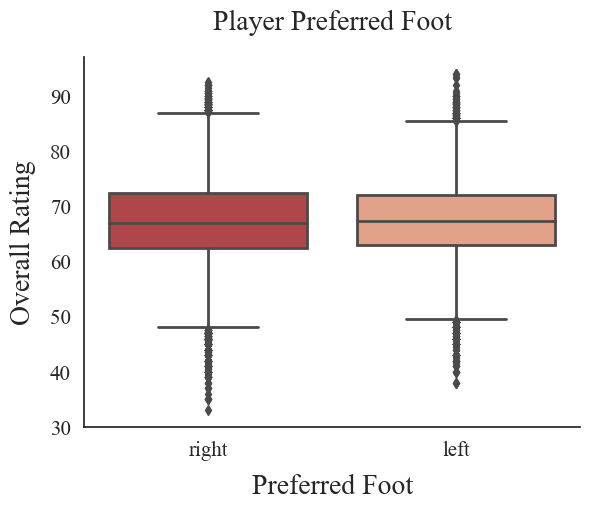

In [217]:
plt.rcParams.update(params)

sns.boxplot(x="PreferredFoot", y="OverallRating", data=players)

plt.xlabel("Preferred Foot")
plt.ylabel("Overall Rating")
plt.title("Player Preferred Foot", fontsize=size)
sns.despine()

### Section Summary
> * In this section we clearly see that being dominant in one foot or another does not having any bearing on the overall rating of a player. 
> * The left-footers have slightly better overall rating. 

## Body Mass Index

The visualization below shows the body mass index (BMI) of the players.

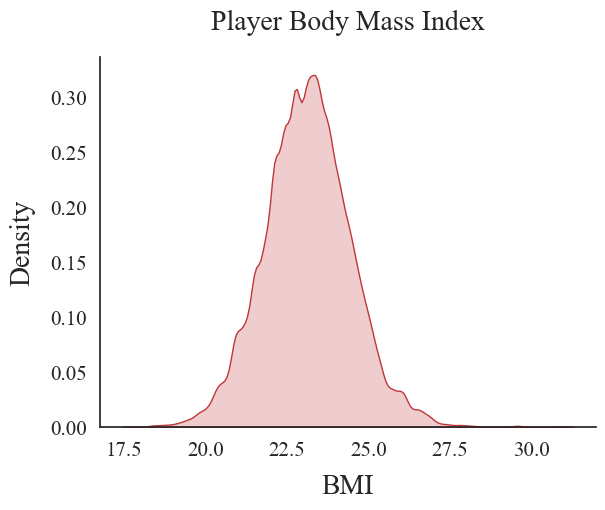

In [223]:
plt.rcParams.update(params)

sns.kdeplot(data=players["BMI"], fill=True, legend=True)

plt.title("Player Body Mass Index", fontsize=size)
sns.despine()

### Section Summary
> * The BMI of most players is between 21 and 25.

## Current and Potential Rating of Players

The graph below depicts a comparison between the current and potential overall rating of the players. 

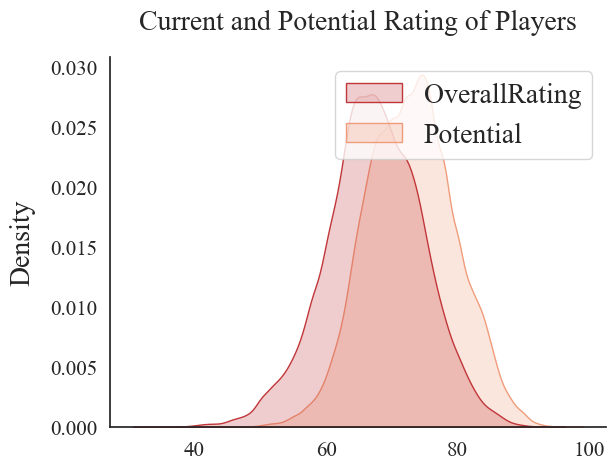

In [264]:
plt.rcParams.update(params)

sns.kdeplot(data=players[["OverallRating", "Potential"]], fill=True, legend=True)

plt.title("Current and Potential Rating of Players", fontsize=size)
sns.despine()
plt.show()

### Section Summary
> * THe players are usually rated with a higher future potential than their current overall rating.

## Attack and Defense Ratings of Players

The graph depicts the attack and defense work rate of the players. See definitions above.

In [11]:
players["AttackWorkRate"].value_counts()
allowed_values = ["high", "medium", "low"]
players.loc[~players["AttackWorkRate"].isin(allowed_values), "AttackWorkRate"] = np.nan

attack_values = players.groupby("AttackWorkRate")["PlayerID"].nunique()
attack_values = (
    attack_values.to_frame().reset_index().rename(columns={"PlayerID": "Count"})
)
attack_values = attack_values.sort_values("Count", ascending=False)

In [12]:
players["DefenceWorkRate"].value_counts()
allowed_values = ["high", "medium", "low"]
players.loc[
    ~players["DefenceWorkRate"].isin(allowed_values), "DefenceWorkRate"
] = np.nan

defence_values = players.groupby("DefenceWorkRate")["PlayerID"].nunique()
defence_values = (
    defence_values.to_frame().reset_index().rename(columns={"PlayerID": "Count"})
)
defence_values = defence_values.sort_values("Count", ascending=False)

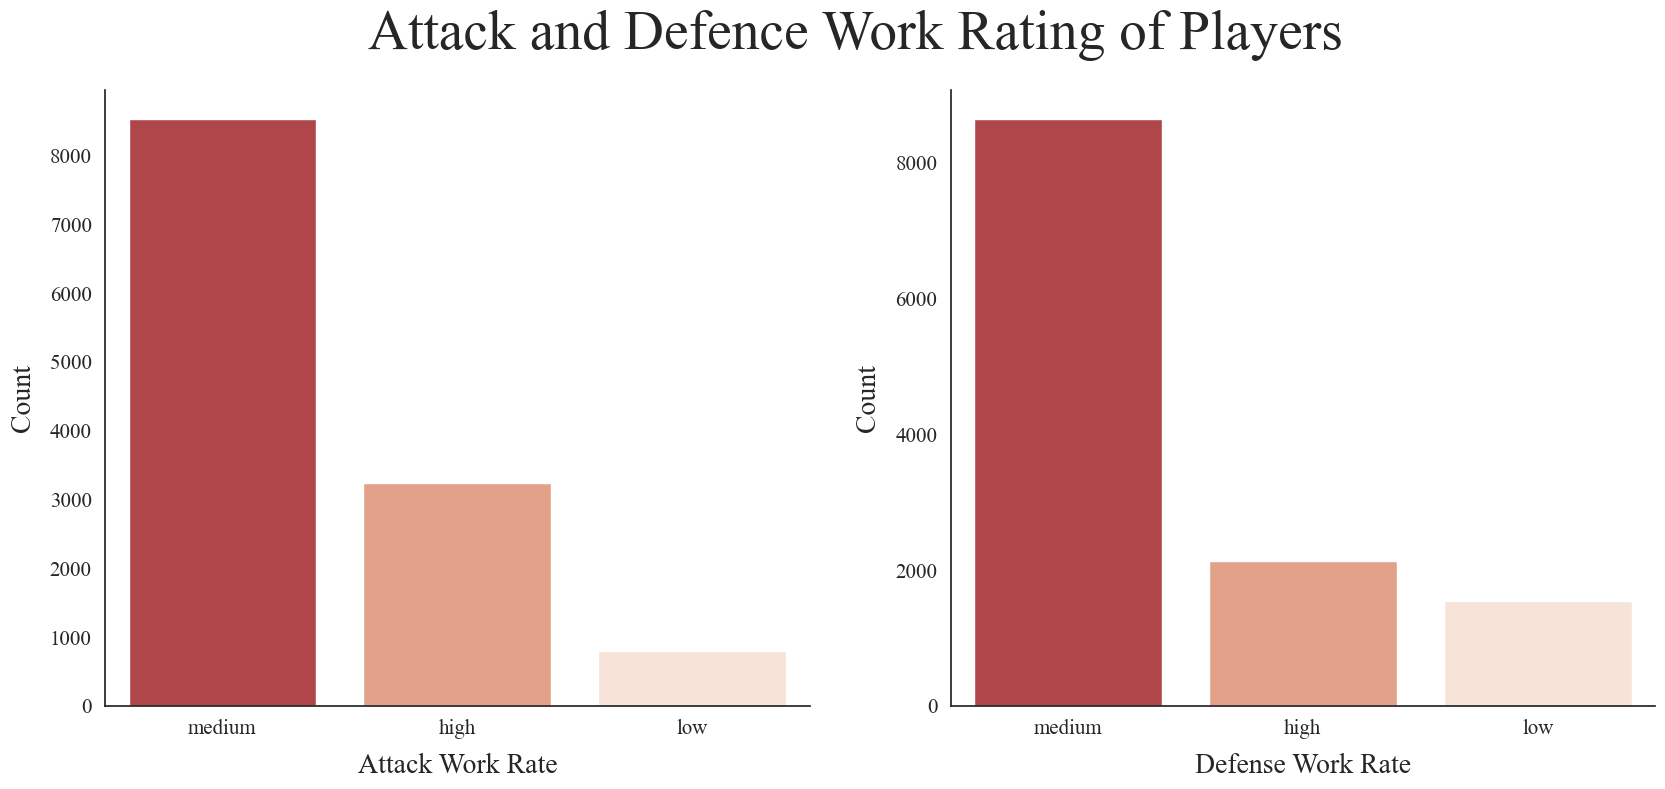

In [13]:
plt.rcParams.update(params)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot(data=attack_values, x="AttackWorkRate", y="Count", ax=ax1)
sns.barplot(data=defence_values, x="DefenceWorkRate", y="Count", ax=ax2)

ax1.set_xlabel("Attack Work Rate")
ax1.set_ylabel("Count")

ax2.set_xlabel("Defense Work Rate")
ax2.set_ylabel("Count")

plt.suptitle("Attack and Defence Work Rating of Players", fontsize=size * 2)
sns.despine()

### Section Summary
> * By far, most players are at a medium level in both categories.

## Player Birth Years

The graph depicts the year of birth of the players.

In [62]:
birthdays = players.groupby("Birthday")["PlayerID"].nunique()
birthdays = birthdays.to_frame().reset_index().rename(columns={"PlayerID": "Count"})

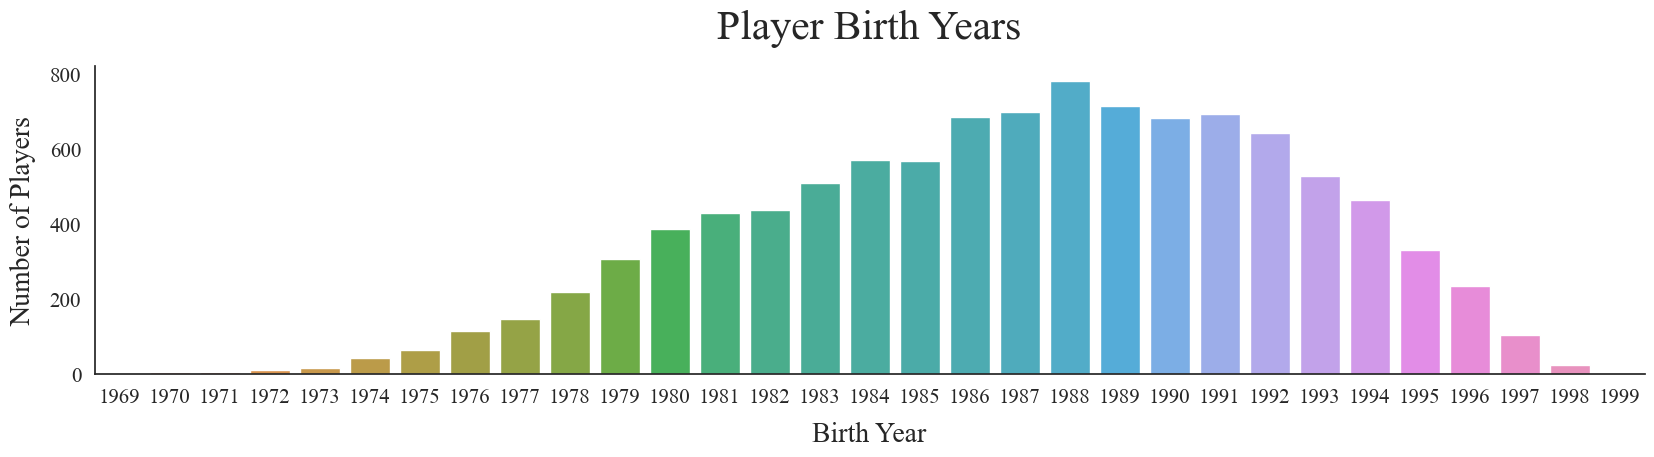

In [69]:
plt.rcParams.update(params)
fig, ax = plt.subplots(figsize=(20, 4))

sns.barplot(data=birthdays, x="Birthday", y="Count")

ax.set_xlabel('Birth Year')
ax.set_ylabel('Number of Players')
plt.title("Player Birth Years", fontsize=size * 1.5)
sns.despine()

### Section Summary
> * According the date range of this data, most players are in their twenties.

## Players' Height and Weight

The graph depicts the Height and weight of the players.

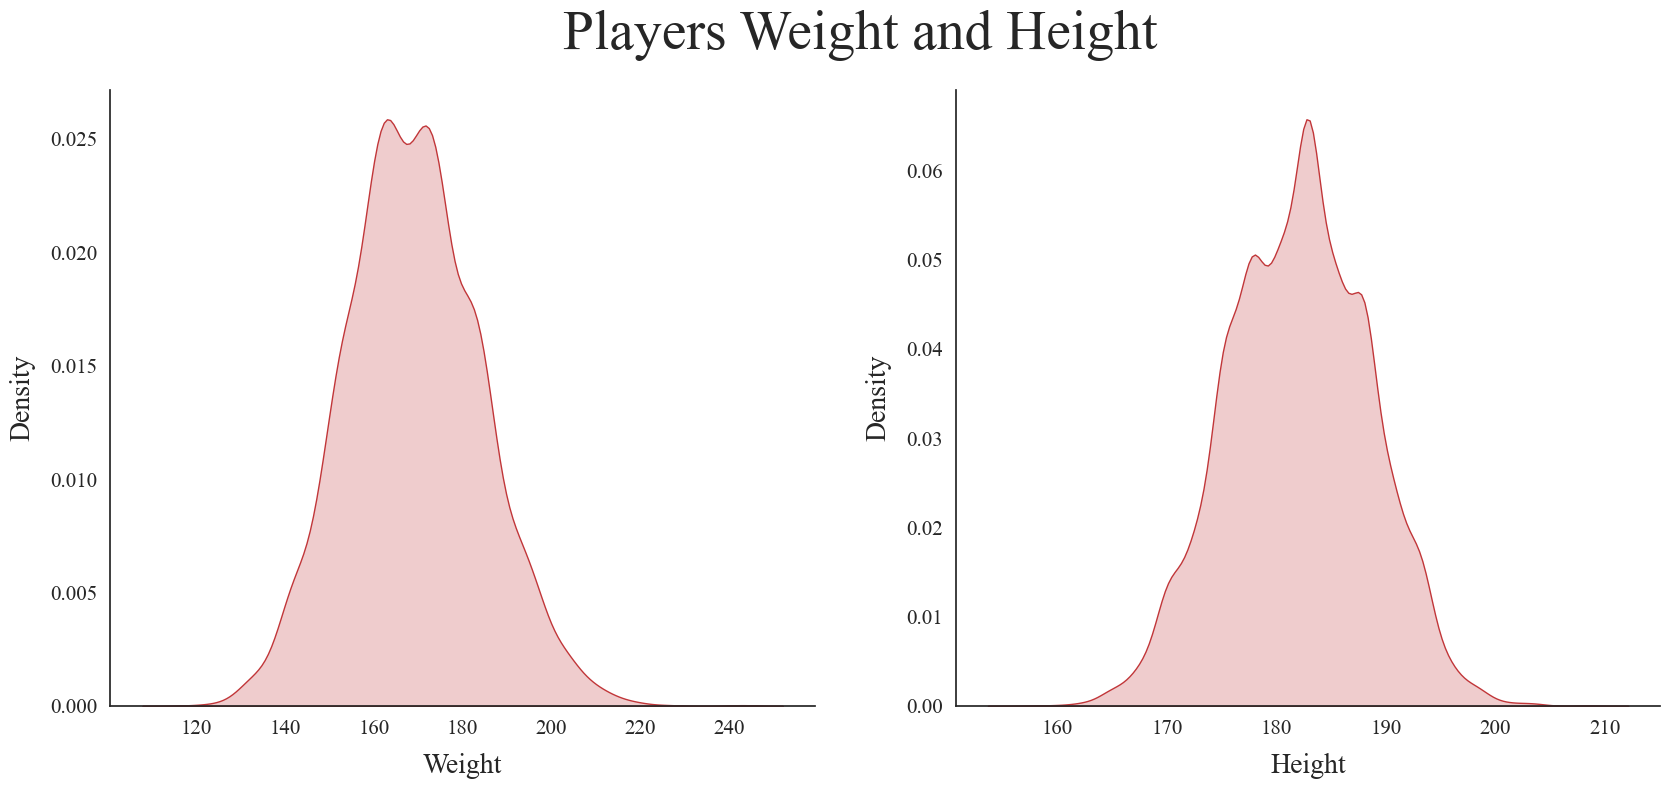

In [13]:
plt.rcParams.update(params)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

sns.kdeplot(data=players["Weight"], fill=True, legend=True, ax=ax1, bw=0.2)
sns.kdeplot(data=players["Height"], fill=True, legend=True, ax=ax2, bw=0.2)

plt.suptitle("Players Weight and Height", fontsize=size * 2)
sns.despine()

### Section Summary
> * Weight: Most players are between 160 and 180 kg. 
> * Height: Most players are between 175 and 190 cm. 

## Total Number of Goals Made at Home Games and Away Games

The graph below depicts the total number of goals made by games played at home rather than games played away.

In [18]:
goals = matches[["HomeGoal", "AwayGoal"]]
goals = goals.sum(numeric_only=True)
goals = goals.to_frame().reset_index().rename(columns={"index": "Goals", 0: "Count"})

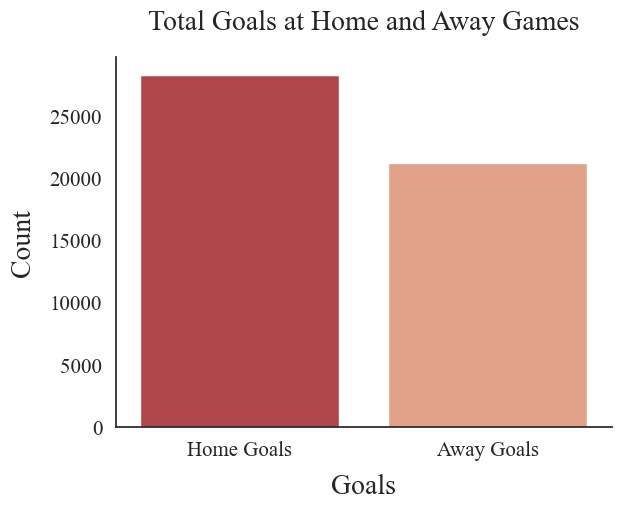

In [20]:
plt.rcParams.update(params)
fig, ax = plt.subplots()

sns.barplot(x="Goals", y="Count", data=goals)

ax.set_xticklabels(["Home Goals", "Away Goals"])
plt.title("Total Goals at Home and Away Games", fontsize=size)
sns.despine()

### Section Summary
> * More goals were made at home games.

## Total Goals by Season at Home and Away Games

The graph below depicts the total number of goals made in each season

In [23]:
goals_season = matches[["Date", "HomeGoal", "AwayGoal"]].groupby(by="Date").sum()
goals_season = goals_season.rename(
    columns={"HomeGoal": "Home Goals", "AwayGoal": "Away Goals"}
)

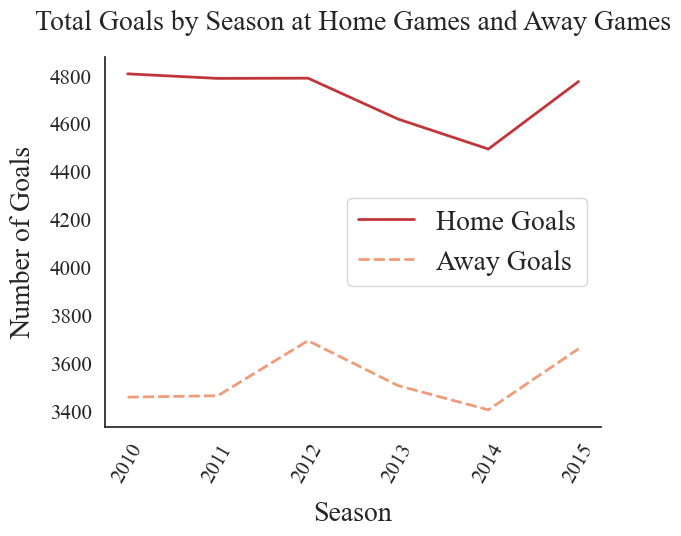

In [28]:
plt.rcParams.update(params)

sns.lineplot(data=goals_season)
plt.xticks(rotation=60)

labels = ["Away Goals", "Home Goals"]
plt.ylabel("Number of Goals")
plt.xlabel("Season")
plt.title("Total Goals by Season at Home Games and Away Games", fontsize=size)
sns.despine()

### Section Summary
> * In every season, the number of goals made by home teams were higher than by away teams.

### Section Summary
> * It is clear from the scatter plot and the performance metrics above that there is not a linear relationship between free sulfur dioxide and alcohol values.

## Leagues by Total Number of Wins

The graph below depicts orders the leagues by total number of wins.

In [14]:
league_most_wins = (
    matches.groupby("LeagueName")["Result"]
    .sum()
    .to_frame()
    .reset_index()
    .sort_values("Result", ascending=False)
)

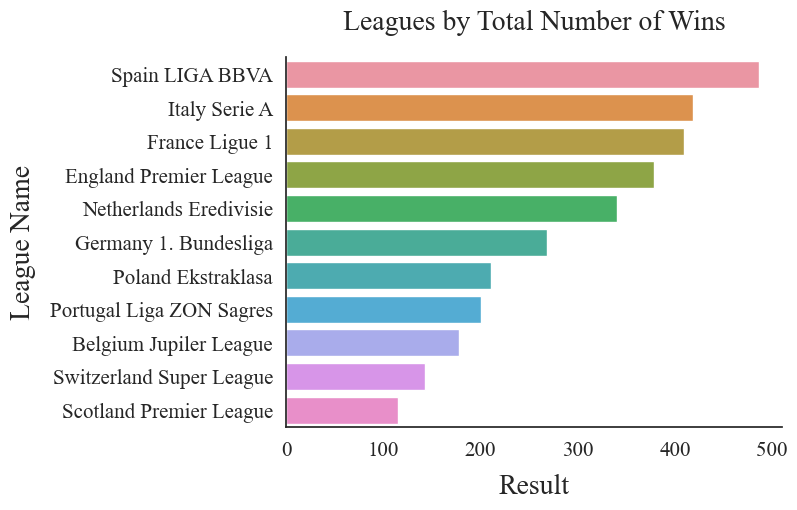

In [15]:
plt.rcParams.update(params)
fig, ax = plt.subplots()

sns.barplot(x="Result", y="LeagueName", data=league_most_wins)

ax.set_ylabel("League Name")
plt.title("Leagues by Total Number of Wins", fontsize=size)
sns.despine()

### Section Summary
> * Highest: Spain LIGA BBVA
> * Lowest: Scotland Premier League

## Top 10 Teams by Total Number of Wins

The graph below depicts the top 10 team with most wins.

In [16]:
team_most_wins = (
    matches.groupby("HomeTeamLongName")["Result"]
    .sum()
    .to_frame()
    .reset_index()
    .sort_values("Result", ascending=False)
)
team_most_wins = team_most_wins.head(10)

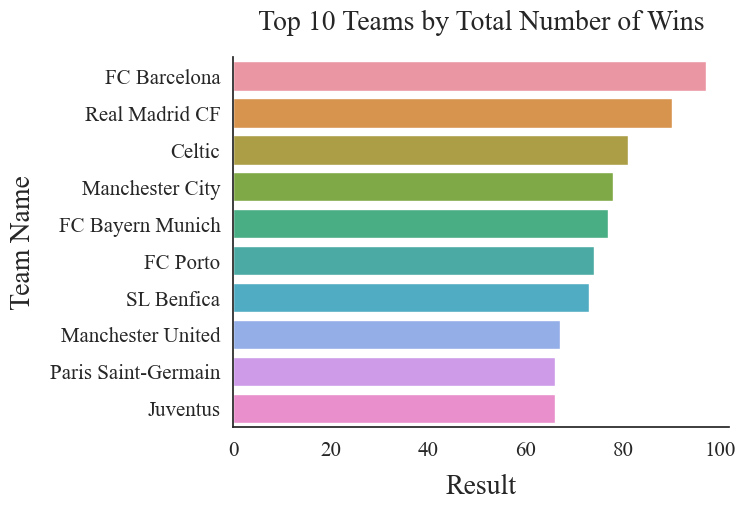

In [17]:
plt.rcParams.update(params)
fig, ax = plt.subplots()

sns.barplot(x="Result", y="HomeTeamLongName", data=team_most_wins)

ax.set_ylabel("Team Name")
plt.title("Top 10 Teams by Total Number of Wins", fontsize=size)
sns.despine()

### Section Summary
> * FC Barcelona, Real Madrid CF, Celtic.

# Machine Learning

## Loading the Matches Dataframe

In [5]:
matches = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\matches.csv",
    index_col=0,
)

In [6]:
matches.sort_values('Date').head()

,Date,LeagueID,LeagueName,MatchID,HomeTeamID,HomeTeamLongName,HomeTeamShortName,AwayTeamID,AwayTeamLongName,AwayTeamShortName,HomeGoal,AwayGoal,Result,HomePlayer1,HomePlayer2,HomePlayer3,HomePlayer4,HomePlayer5,HomePlayer6,HomePlayer7,HomePlayer8,HomePlayer9,HomePlayer10,HomePlayer11,AwayPlayer1,AwayPlayer2,AwayPlayer3,AwayPlayer4,AwayPlayer5,AwayPlayer6,AwayPlayer7,AwayPlayer8,AwayPlayer9,AwayPlayer10,AwayPlayer11,HomeShoton,AwayShoton,HomeShotoff,AwayShotoff,HomeFoulCommit,AwayFoulCommit,HomeCard,AwayCard,HomeCross,AwayCross,HomeCorner,AwayCorner,HomePossession,AwayPossession,HomeBuildUpPlaySpeed,HomeBuildUpPlayPassing,HomeChanceCreationPassing,HomeChanceCreationCrossing,HomeChanceCreationShooting,HomeDefencePressure,HomeDefenceAggression,HomeDefenceTeamWidth,AwayBuildUpPlaySpeed,AwayBuildUpPlayPassing,AwayChanceCreationPassing,AwayChanceCreationCrossing,AwayChanceCreationShooting,AwayDefencePressure,AwayDefenceAggression,AwayDefenceTeamWidth
0,2010,1,Belgium Jupiler League,665626,8635,RSC Anderlecht,AND,8342,Club Brugge KV,CLB,3,2,1,72.0,72.0,72.0,74.0,70.0,71.0,75.0,68.0,72.0,78.0,74.0,72.0,72.0,68.0,72.0,68.0,69.0,70.0,70.0,70.0,72.0,70.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,52.0,48.0,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70
11276,2010,15722,Poland Ekstraklasa,838608,2183,P. Warszawa,PWA,10265,Wisła Kraków,WIS,0,1,-1,65.0,56.0,68.0,72.0,60.0,61.0,59.0,68.0,72.0,72.0,68.0,67.0,69.0,65.0,63.0,65.0,71.0,66.0,72.0,73.0,72.0,74.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,52.0,48.0,30,40,45,40,70,55,65,55,40,35,55,35,70,70,70,65
11277,2010,15722,Poland Ekstraklasa,674856,8028,Piast Gliwice,PIG,10265,Wisła Kraków,WIS,1,4,-1,73.0,70.0,67.0,72.0,70.0,71.0,64.0,72.0,63.0,45.0,59.0,73.0,70.0,71.0,69.0,64.0,71.0,71.0,71.0,66.0,62.0,74.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,52.0,48.0,30,45,45,35,70,65,70,60,40,35,55,35,70,70,70,65
11278,2010,15722,Poland Ekstraklasa,674870,8673,Legia Warszawa,LEG,10265,Wisła Kraków,WIS,0,3,-1,74.0,63.0,72.0,67.0,70.0,71.0,72.0,58.0,72.0,69.0,73.0,73.0,70.0,69.0,71.0,64.0,66.0,71.0,71.0,64.0,62.0,74.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,52.0,48.0,30,35,55,45,70,65,70,60,40,35,55,35,70,70,70,65
11279,2010,15722,Poland Ekstraklasa,838509,2182,Lech Poznań,POZ,10265,Wisła Kraków,WIS,4,1,1,59.0,56.0,74.0,72.0,57.0,65.0,64.0,71.0,70.0,66.0,62.0,67.0,69.0,72.0,65.0,65.0,53.0,71.0,66.0,69.0,72.0,74.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,52.0,48.0,40,35,45,40,70,60,55,45,40,35,55,35,70,70,70,65


## Logistic Regression

In [14]:
X = matches.loc[:, "HomePlayer1":"AwayDefenceTeamWidth"]
y = matches["Result"]

The logistic regresssion model did not show good results.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, shuffle=True, random_state=101)

In [49]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [50]:
log_model = LogisticRegression(solver="saga", multi_class="ovr", max_iter=5000)

In [51]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', solver='saga')

In [52]:
y_predict = log_model.predict(scaled_X_test)

In [53]:
confusion_matrix(y_test, y_predict)

array([[ 535,    8,  507],
       [ 290,    4,  639],
       [ 278,   12, 1376]], dtype=int64)

In [54]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.49      0.51      0.50      1050
           0       0.17      0.00      0.01       933
           1       0.55      0.83      0.66      1666

    accuracy                           0.52      3649
   macro avg       0.40      0.45      0.39      3649
weighted avg       0.43      0.52      0.45      3649



### Section Summary
> * It is clear from the scatter plot and the performance metrics above that there is not a linear relationship between free sulfur dioxide and alcohol values.

## PCA

Principle Component Analysis

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
pca = PCA(n_components=None)
pca.fit(X_scaled)

PCA()

In [24]:
print("Eigenvalues:")
print(pca.explained_variance_)
print()

Eigenvalues:
[1.27784196e+01 6.78254489e+00 4.28732218e+00 2.80243344e+00
 1.94798223e+00 1.75933876e+00 1.30138314e+00 1.25765284e+00
 1.15218722e+00 1.13516716e+00 9.34662999e-01 8.43165617e-01
 8.32261361e-01 7.72375466e-01 7.18475722e-01 7.16747354e-01
 6.41628452e-01 6.33278077e-01 6.08211261e-01 5.84044220e-01
 4.92095710e-01 4.39359808e-01 3.86246290e-01 3.67884627e-01
 3.51895407e-01 3.44990994e-01 3.42791233e-01 3.41097356e-01
 3.34638479e-01 3.31027388e-01 3.26576330e-01 3.25585566e-01
 3.22285510e-01 3.20200202e-01 3.17761745e-01 3.11026653e-01
 3.08068184e-01 3.03932744e-01 3.01221499e-01 2.98462995e-01
 2.96992099e-01 2.94199485e-01 2.90958336e-01 2.80327601e-01
 2.79710143e-01 2.62651997e-01 2.49023096e-01 2.19708985e-01
 2.06722500e-01 1.35149228e-01 1.30976378e-01 2.52009892e-30]



In [25]:
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[2.45725368e+01 1.30426406e+01 8.24439840e+00 5.38899966e+00
 3.74591432e+00 3.38315830e+00 2.50252270e+00 2.41843058e+00
 2.21562319e+00 2.18289412e+00 1.79733032e+00 1.62138346e+00
 1.60041489e+00 1.48525602e+00 1.38160834e+00 1.37828474e+00
 1.23383323e+00 1.21777570e+00 1.16957293e+00 1.12310040e+00
 9.46286030e-01 8.44876394e-01 7.42740610e-01 7.07431656e-01
 6.76684841e-01 6.63407851e-01 6.59177774e-01 6.55920497e-01
 6.43500261e-01 6.36556236e-01 6.27996978e-01 6.26091767e-01
 6.19745854e-01 6.15735866e-01 6.11046783e-01 5.98095392e-01
 5.92406340e-01 5.84454008e-01 5.79240361e-01 5.73935835e-01
 5.71107344e-01 5.65737227e-01 5.59504589e-01 5.39061989e-01
 5.37874635e-01 5.05072307e-01 4.78864318e-01 4.22494118e-01
 3.97521477e-01 2.59888116e-01 2.51863843e-01 4.84607841e-30]



Text(0, 0.5, 'Explained variance (%)')

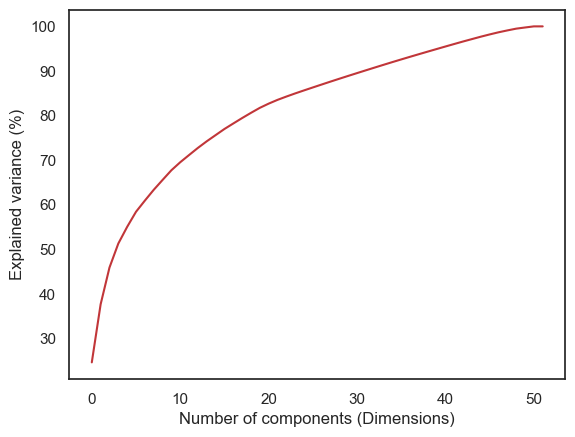

In [26]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

In [29]:
X_pca = pd.DataFrame(X_pca)
print(X_pca.head())
print("\nSize: ")
print(X_pca.shape)

         0         1         2         3         4         5         6   \
0  0.035216 -0.118985  0.719152  2.148871  3.494482  0.857046 -0.203447   
1 -0.785478  0.043123 -0.093071  2.188625  3.454294  0.382856 -0.048850   
2 -2.900903  0.551126 -1.823413  2.328462  3.856562 -1.168829 -0.790897   
3 -2.622294  0.601306 -1.656070  2.364181  2.172798 -0.382874 -0.586375   
4 -2.314951  0.453871 -1.465352  0.774226  1.877368 -0.612125 -0.606723   

         7         8         9         10        11        12        13  \
0  1.057316  0.096698 -1.031296 -0.713123 -0.530065  1.066181 -0.999868   
1  1.437787 -0.078954 -0.960263 -0.684950 -0.518734  1.173728 -1.023704   
2  2.045945 -0.782497 -1.591368  0.389626 -0.137196  1.169737  0.716841   
3  1.979405  0.871809 -1.993071  1.305167 -0.360485  1.274500  0.139008   
4  0.834573  1.535273 -1.731758  0.115783 -0.009838  1.172210  0.192706   

         14        15        16        17        18        19  
0 -1.231182 -1.128472  0.812050  0

In [55]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.20, shuffle=True, random_state=101
)

log_model = LogisticRegression(solver="saga", multi_class="ovr", max_iter=5000)
log_model.fit(X_train_pca, y_train)

y_predict = log_model.predict(X_test_pca)

In [56]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.47      0.49      0.48      1050
           0       0.33      0.00      0.00       933
           1       0.54      0.83      0.66      1666

    accuracy                           0.52      3649
   macro avg       0.45      0.44      0.38      3649
weighted avg       0.47      0.52      0.44      3649



### Section Summary
> * It is clear from the scatter plot and the performance metrics above that there is not a linear relationship between free sulfur dioxide and alcohol values.

## Random Forest

Random Forest cannot overfit.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, shuffle=True, random_state=101)

In [60]:
model = RandomForestClassifier(n_estimators=10, max_features="sqrt", random_state=101)

In [61]:
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [63]:
confusion_matrix(y_test, preds)

array([[ 453,  176,  421],
       [ 287,  162,  484],
       [ 366,  276, 1024]], dtype=int64)

In [64]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.41      0.43      0.42      1050
           0       0.26      0.17      0.21       933
           1       0.53      0.61      0.57      1666

    accuracy                           0.45      3649
   macro avg       0.40      0.41      0.40      3649
weighted avg       0.43      0.45      0.43      3649



### Section Summary
> * It is clear from the scatter plot and the performance metrics above that there is not a linear relationship between free sulfur dioxide and alcohol values.

## Random Forest Grid Search

Testing different models.

In [128]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

In [65]:
n_estimators = [
    5,
    15,
    25,
]
max_features = [4, 14, 24]
bootstrap = [True, False]
oob_score = [True, False]

In [66]:
param_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "bootstrap": bootstrap,
    "oob_score": oob_score,
}

In [67]:
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, param_grid)

In [68]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [4, 14, 24],
                         'n_estimators': [5, 15, 25],
                         'oob_score': [True, False]})

In [69]:
grid.best_params_

{'bootstrap': True, 'max_features': 14, 'n_estimators': 25, 'oob_score': True}

In [70]:
preds = grid.predict(X_test)

In [71]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          -1       0.43      0.41      0.42      1050
           0       0.29      0.15      0.19       933
           1       0.54      0.71      0.61      1666

    accuracy                           0.48      3649
   macro avg       0.42      0.42      0.41      3649
weighted avg       0.45      0.48      0.45      3649



In [ ]:
rfc = RandomForestClassifier(
    bootstrap=True, max_features=28, n_estimators=15, oob_score=False
)

In [ ]:
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)

In [ ]:
confusion_matrix(y_test, preds)

In [ ]:
print(classification_report(y_test, preds))

### Section Summary
> * It is clear from the scatter plot and the performance metrics above that there is not a linear relationship between free sulfur dioxide and alcohol values.

## ELI5

Model importance

In [ ]:
log_model.fit(X_test, y_test)

perm = PermutationImportance(log_model, random_state=1)

eli.show_prediction(
    log_model, X_test.iloc[1], feature_names=list(X.columns), show_feature_values=True
)

### Section Summary
> * It is clear from the scatter plot and the performance metrics above that there is not a linear relationship between free sulfur dioxide and alcohol values.

# Conclusions

Here is a summary of the conclusions that may be drawn from this report. 

>* **The Analysis of the Data:** I reviewed nearly 1,600 data points of red Portuguese "Vinho Verde" wines. The data in this dataset is imbalanced. For example, while there are only 18 wines of quality 8 there are 681 wines of quality 5. It is hard to trust our conclusions fully since we don't have a balance in the amount of data in each quality category.<br> 
>* **The Goals:** The goal of this analysis was to determine what makes wine, "good." Since the quality score was given subjectively by a human taster, I chose both 7 and 8 as "good quality," to allow for the natural subjectivity that went into scoring the quality of wines. The report divided the wines in the dataset into two groups: Good wines were quality 7 or 8. Bad wines were quality 3 - 6. The other goal was to predict the alcohol values from the data in this dataset. <br> 
>* **Multivariant Logistic Regression Model to Predict Quality:** The logistic regression model I tested in this report used 7 features. It predicted quality with an ADEQUATE accuracy score of approximately 0.80. <br>
>* **Multivariant Decision Tree Model to Predict Quality:** The decision tree model I tested in this report used 7 features. It predicted quality with an ADEQUATE accuracy score of 0.80. <br>
>* **Multivariant Linear Regression Model to Predict Alcohol:** The linear regression model I tested in this report used 6 features. It predicted alcohol with an INADEQUATE R-Squared value of 0.44 and an INADEQUATE adjusted R-Squared value of 0.39. It was clear from the scatter plots that the relationships of none of the features with alcohol were linear. It would be prudent to assume that a non-linear model may give better results.<br> 
>* **Overall Conclusion:** This analysis seems to indicate that it is possible to adequately predict the quality values from other data in this dataset but it is not possible to adequately predict the alcohol values from the data in this dataset. <br> 

# Suggestions for Improvement

This report has certain weaknesses. In this section, I outlined those weaknesses and indicated some avenues for improvement. 

>* **The Dataset:** As I've mentioned in several locations in this report, the data in this dataset is imbalanced concerning data on wines of different qualities. A more balanced dataset would improve the quality of this analysis substantially. <br>
>* **Logistic Regression Model:** My model had an accuracy value of approximately 0.80. The model could improve to achieve a higher accuracy value. I will continue to learn more about creating such models.<br>
>* **Decision Tree Model:** My model had an accuracy value of approximately 0.80, almost identical to the logistic regression model. Similar to the logistic regression model, this model could improve to achieve a higher accuracy value and I will continue to learn more in this area as well.<br>
>* **Linear Regression Model:** Perhaps it is possible to create a better model to predict alcohol values. The results I obtained with my linear regression model were not impressive. Working with non-linear models could be more helpful.<br>
>* **Data Scaling:** I scaled the data for all models that I tested before I split the data into train and test sets. By doing so, I changed the data before the model could see it. This is not a good practice. It is better if the model works with unchanged, "never seen before" data. <br>
>* **Statistics:** I will continue to improve my statistical knowledge to create better analyses.<br>
>* **Pandas:** I will continue to learn to utilize more optimized Pandas techniques and algorithms.<br>
>* **Seaborn and Matplotlib:** I will continue to improve my knowledge of Seaborn and Matplotlib for creating visualizations. <br>
>* **Python Code:** I will continue to write better and more efficient Python code. <br>
>* **Clean Code:** I will continue to adhere to the principles of writing clean code. <br>
>* **Readability and Efficiency:** I will continue to improve my skills to find the delicate balance between readability and efficiency in coding.<br>